## Data Desc

In [2]:
import json
import re
import pandas as pd
import numpy as np

In [68]:
var_desc = []
var_dict = {}
for match in re.findall('{(.*?)}', body.group(1)):
    str_dict = json.loads("{"+match+"}")
    req , _ , _ = str_dict.items()
    var_dict[str_dict['Column Name']] = str_dict 
    var_desc.append(str_dict)

In [72]:
pd.DataFrame(var_desc).to_csv("DataDescription.csv",index=False)

In [71]:
with open("./data.json",'w') as f:
    json.dump(var_desc,f)

## Data Cleaning

In [3]:
data = pd.read_csv("./UCI South German Credit - Data.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = data.reset_index().rename(columns={"index":"Id"})

In [6]:
data.kredit.value_counts()

1    700
0    300
Name: kredit, dtype: int64

In [7]:
good_credit = data[data.kredit == 1]
bad_credit = data[data.kredit == 0]

In [8]:
bad_credit

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
22,22,2,36,2,5,2384,1,2,4,3,...,4,33,3,1,1,2,2,1,2,0
45,45,1,18,2,0,1216,1,2,4,2,...,3,23,3,1,1,3,2,2,2,0
47,47,4,18,4,6,1864,2,3,4,2,...,1,30,3,2,2,3,2,1,2,0
97,97,2,36,3,9,4455,1,3,2,1,...,1,30,2,2,2,4,2,2,2,0
110,110,1,15,2,0,3959,1,3,3,2,...,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1,24,2,3,1987,1,3,2,3,...,1,21,3,1,1,2,1,1,2,0
996,996,1,24,2,0,2303,1,5,4,3,...,1,45,3,2,1,3,2,1,2,0
997,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
998,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


In [9]:
gc_test = good_credit.sample(100)
bc_test = bad_credit.sample(100)
test = pd.concat([gc_test,bc_test])

In [10]:
good_credit = good_credit.drop(index = gc_test.index)
bad_credit = bad_credit.drop(index = bc_test.index)

In [11]:
train = pd.concat([good_credit,bad_credit])

In [12]:
test = test.sort_values(by='Id')

In [13]:
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

In [14]:
SolutionSet = test.loc[:,['Id','kredit']]

In [15]:
test = test.drop('kredit',axis=1)

In [16]:
test

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,10,1,11,4,0,3905,1,3,2,3,...,2,1,36,3,1,2,3,1,1,2
1,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
2,19,4,11,4,0,7228,1,3,1,3,...,4,2,39,3,2,2,2,2,1,2
3,23,2,12,4,4,1424,1,4,4,3,...,3,2,26,3,2,1,3,2,1,2
4,33,4,24,2,3,1376,3,4,4,2,...,1,3,28,3,2,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,990,1,18,2,6,750,1,1,4,2,...,1,1,27,3,2,1,1,2,1,2
196,992,1,18,2,1,7511,5,5,1,3,...,4,2,51,3,3,1,3,1,2,2
197,993,1,18,4,0,3966,1,5,1,2,...,4,1,33,1,1,3,3,2,2,2
198,994,1,12,0,3,6199,1,3,4,3,...,2,2,28,3,1,2,3,2,2,2


In [35]:
train

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,33,1,1,3,3,2,2,2,0
796,994,1,12,0,3,6199,1,3,4,3,...,2,28,3,1,2,3,2,2,2,0
797,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
798,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


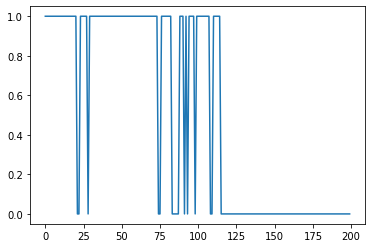

In [19]:
SolutionSet.kredit.plot()

In [41]:
SampleSubs = SolutionSet.copy()
SampleSubs.kredit = [1 for i in range(len(SampleSubs.index))]

In [44]:
SampleSubs

,Id,kredit
0,4,1
1,14,1
2,18,1
3,20,1
4,22,1
...,...,...
195,982,1
196,984,1
197,988,1
198,995,1


In [46]:
train.to_csv("./Data Files/train.csv",index=False)
test.to_csv("./Data Files/test.csv",index=False)
SolutionSet.to_csv("./Data Files/SolutionSet.csv",index=False)
SampleSubs.to_csv("./Data Files/SampleSubmission.csv",index=False)

In [48]:
for i,col in enumerate(test.columns):
    print(i,col)

0 Id
1 laufkont
2 laufzeit
3 moral
4 verw
5 hoehe
6 sparkont
7 beszeit
8 rate
9 famges
10 buerge
11 wohnzeit
12 verm
13 alter
14 weitkred
15 wohn
16 bishkred
17 beruf
18 pers
19 telef
20 gastarb
